In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import why

from IPython.display import Markdown as md
import warnings
warnings.filterwarnings("ignore")

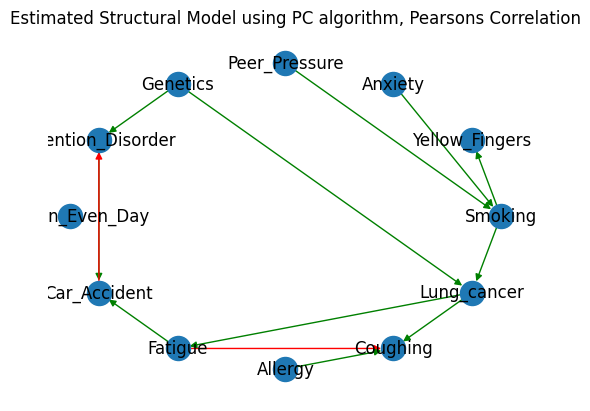

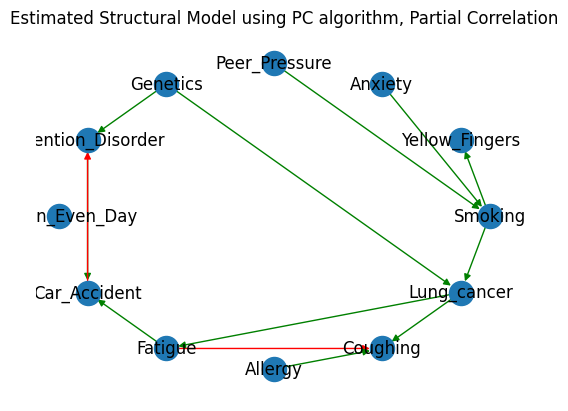

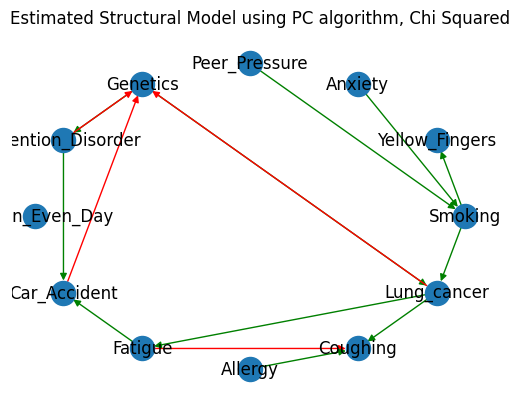

# Evaluation on LUCAS
| Method       | Accuracy    |
| :---        |    ---:   |
| Pearsons Correlation | 84.6154%
| Partial Correlation | 84.6154%
| Chi Squared | 73.3333%


In [19]:
def evaluate(graph, method=""):
    gt_graph = nx.read_gpickle("./data/lucas0_gt.gpickle")

    colors = []
    count = 0
    for edge in graph.edges():
        if edge in gt_graph.edges():
            colors.append("green")
            count += 1
        else:
            colors.append("red")

    acc = (100*count/len(graph.edges()))
    plt.title("Estimated Structural Model using PC algorithm, " + method)
    nx.draw_circular(graph, edge_color=colors, with_labels=True)
    plt.show()
    return acc
    
df = pd.read_csv("./data/lucas0_train.csv")

independence_test = why.CausalDiscovery.PearsonsCorrelation(0.05)
PC_pearson = why.CausalDiscovery.CausalDiscoveryPC(df, independence_test)
graph_pearson = PC_pearson.get_networkx_graph(draw=False)

independence_test = why.CausalDiscovery.PartialCorrelation(0.05)
PC_partial = why.CausalDiscovery.CausalDiscoveryPC(df, independence_test)
graph_partial = PC_partial.get_networkx_graph(draw=False)

independence_test = why.CausalDiscovery.ChiSquared(0.05)
PC_chi = why.CausalDiscovery.CausalDiscoveryPC(df, independence_test)
graph_chi = PC_chi.get_networkx_graph(draw=False)

pearson_acc = evaluate(graph_pearson, "Pearsons Correlation")
partial_acc = evaluate(graph_partial, "Partial Correlation")
chi_acc = evaluate(graph_chi, "Chi Squared")

table = "| Method       | Accuracy    |\n"
table += "| :---        |    ---:   |\n"

table += f"| Pearsons Correlation | {pearson_acc:.4f}%\n"
table += f"| Partial Correlation | {partial_acc:.4f}%\n"
table += f"| Chi Squared | {chi_acc:.4f}%\n"

md("# Evaluation on LUCAS\n"+table)